# **Providing data-driven suggestions for HR**

### Understanding the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### HR dataset

The dataset contains 15,000 rows and 10 columns for the variables listed below. 

Source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

| Variable                | Description                                                  |
|-------------------------|--------------------------------------------------------------|
| satisfaction_level      | Employee-reported job satisfaction level [0–1]               |
| last_evaluation         | Score of employee's last performance review [0–1]            |
| number_project          | Number of projects employee contributes to                   |
| average_monthly_hours   | Average number of hours employee worked per month            |
| time_spend_company      | How long the employee has been with the company (years)      |
| Work_accident           | Whether or not the employee experienced an accident at work  |
| left                    | Whether or not the employee left the company                 |
| promotion_last_5years   | Whether or not the employee was promoted in the last 5 years |
| Department              | The employee's department                                    |
| salary                  | The employee's salary (U.S. dollars)                         |

### Import packages

In [1]:
# Import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# Import machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

# Import metrics and model selection tools
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import plot_tree

# For saving models
import pickle

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**

In [3]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Exploration (EDA and data cleaning)

In [4]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department',
                          'number_project':'number_of_projects'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

In [8]:
# Check for missing values
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_of_projects       0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

In [9]:
# Check for duplicates
print("Number of duplicate rows: ", df0.duplicated().sum())

Number of duplicate rows:  3008


In [10]:
# Inspect some rows containing duplicates as needed
duplicates = df0[df0.duplicated()]
duplicates.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

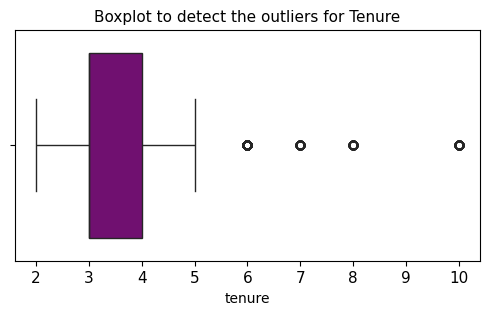

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,3))
plt.title('Boxplot to detect the outliers for Tenure', fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
sns.boxplot(x=df1['tenure'], color='#800080')
plt.show()

In [117]:
# Determine the number of rows containing outliers
Q1 = df1['tenure'].quantile(0.25)
Q3 = df1['tenure'].quantile(0.75)
IQR = Q3 - Q1

outliers = df1[(df1['tenure'] < (Q1 - 1.5 * IQR)) | (df1['tenure'] > (Q3 + 1.5 * IQR))]
print("Number of rows containing outliers: ", outliers.shape[0])

Number of rows containing outliers:  824


In [118]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data visualizations

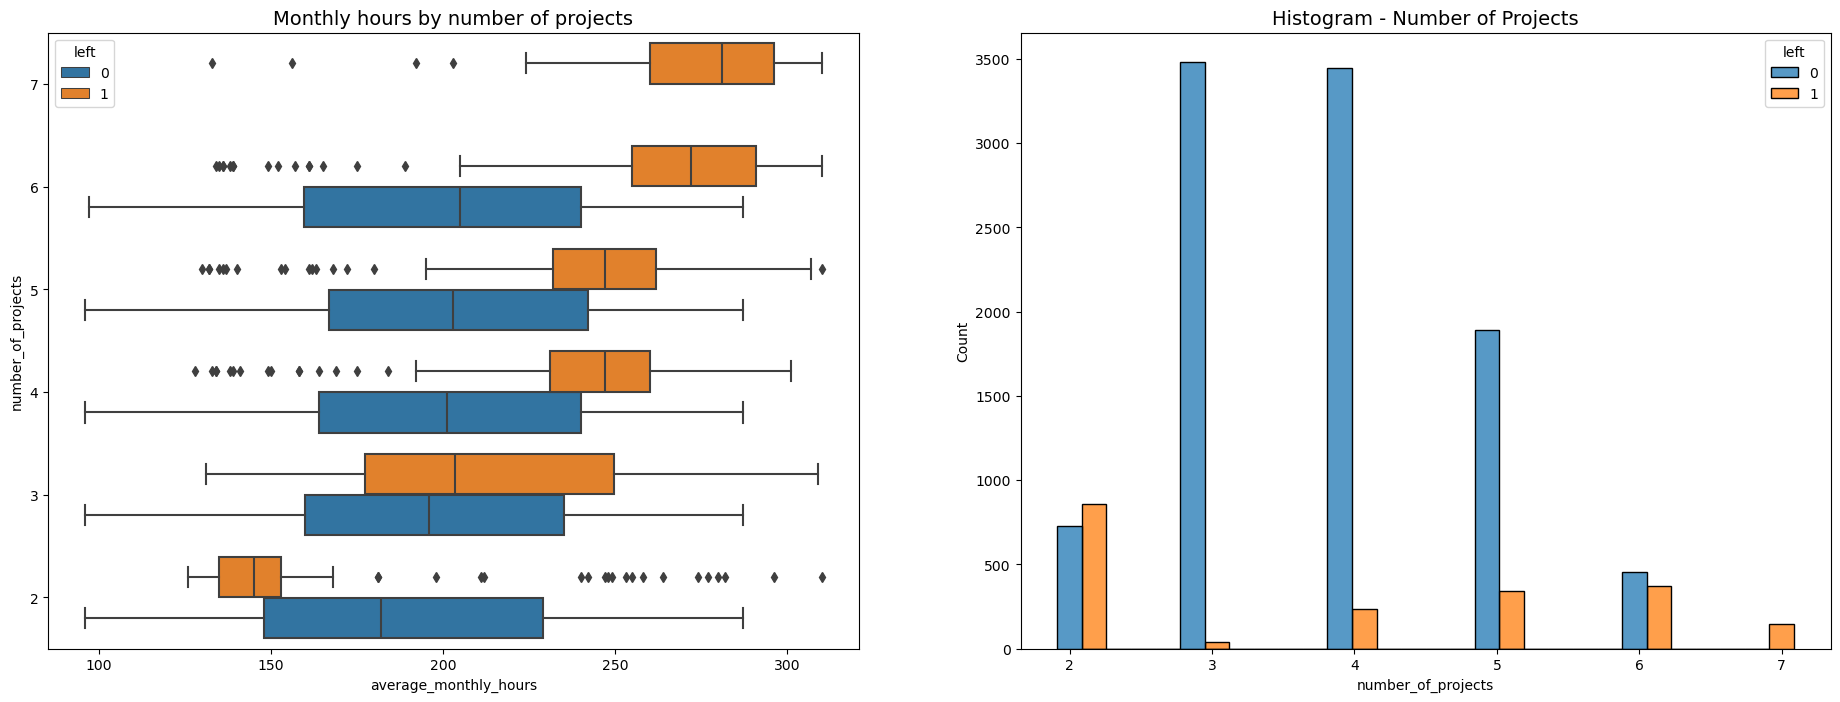

In [119]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (23,8))

# Boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_of_projects', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_of_projects']
tenure_left = df1[df1['left']==1]['number_of_projects']
sns.histplot(data=df1, x='number_of_projects', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Histogram - Number of Projects', fontsize='14')

# Display the plots
plt.show()

**1) Workload and Turnover :-**

 - Employees handling 2 projects worked fewer hours and had a high turnover rate, suggesting that under-engagement or lack of sufficient work could be leading to turnover.
 - **Employees managing 3 - 4 projects had the best retention rates, indicating this might be the optimal workload that keeps employees engaged without overworking them.**
 - Employees with 5 - 7 projects worked more hours and had high turnover rates, implying potential burnout or overwork leading to turnover. Notably, `all employees with 7 projects left the company.`

| Number of Projects | Median Hours (Stayed) | Median Hours (Left) |
|--------------------|-----------------------|---------------------|
| 2                  | ~150 hours/month      | ~120 hours/month    |
| 3                  | ~180 hours/month      | ~160 hours/month    |
| 4                  | ~200 hours/month      | ~220 hours/month    |
| 5                  | ~220 hours/month      | ~250 hours/month    |
| 6                  | ~240 hours/month      | ~270 hours/month    |
| 7                  | N/A                   | ~280 hours/month    |


**2) Employee Departure Patterns :-**

 - Group (A): Employees who worked considerably less than their peers with the same number of projects. This group could include employees who were possibly fired / had already given their notice and were assigned fewer hours as they were transitioning out.
 - Group (B): Employees who worked much more than their peers. These employees likely quit due to overwork and burnout. 

**3)  Average Monthly Hours :-**

Assuming a standard work week of 40 hours and two weeks of vacation per year, the average number of working hours per month is calculated as follows:
Average Monthly Hours = (40 hours/week * 50 weeks/year) / 12 months/year = `166.67 hours/month`. Comparing this to the median hours worked by employees in different project categories, we see that most employees are working considerably more than the average, indicating potential overwork.

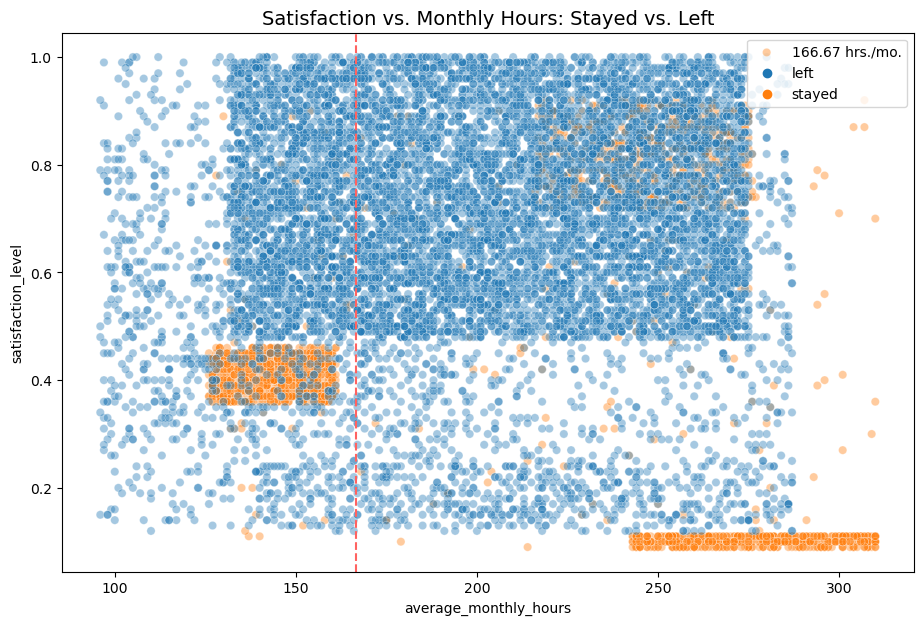

In [120]:
# Scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed vs those who left
plt.figure(figsize=(11,7))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Satisfaction vs. Monthly Hours: Stayed vs. Left', fontsize='14');

- The scatterplot above shows that there was a sizeable group of employees who worked ~ 240 - 315 hours per month, indicating high working hours but low satisfaction scores. 
- The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. 
- Finally, there is a group who worked ~210 - 280 hours per month having satisfaction levels ranging ~ 0.7 - 0.9.

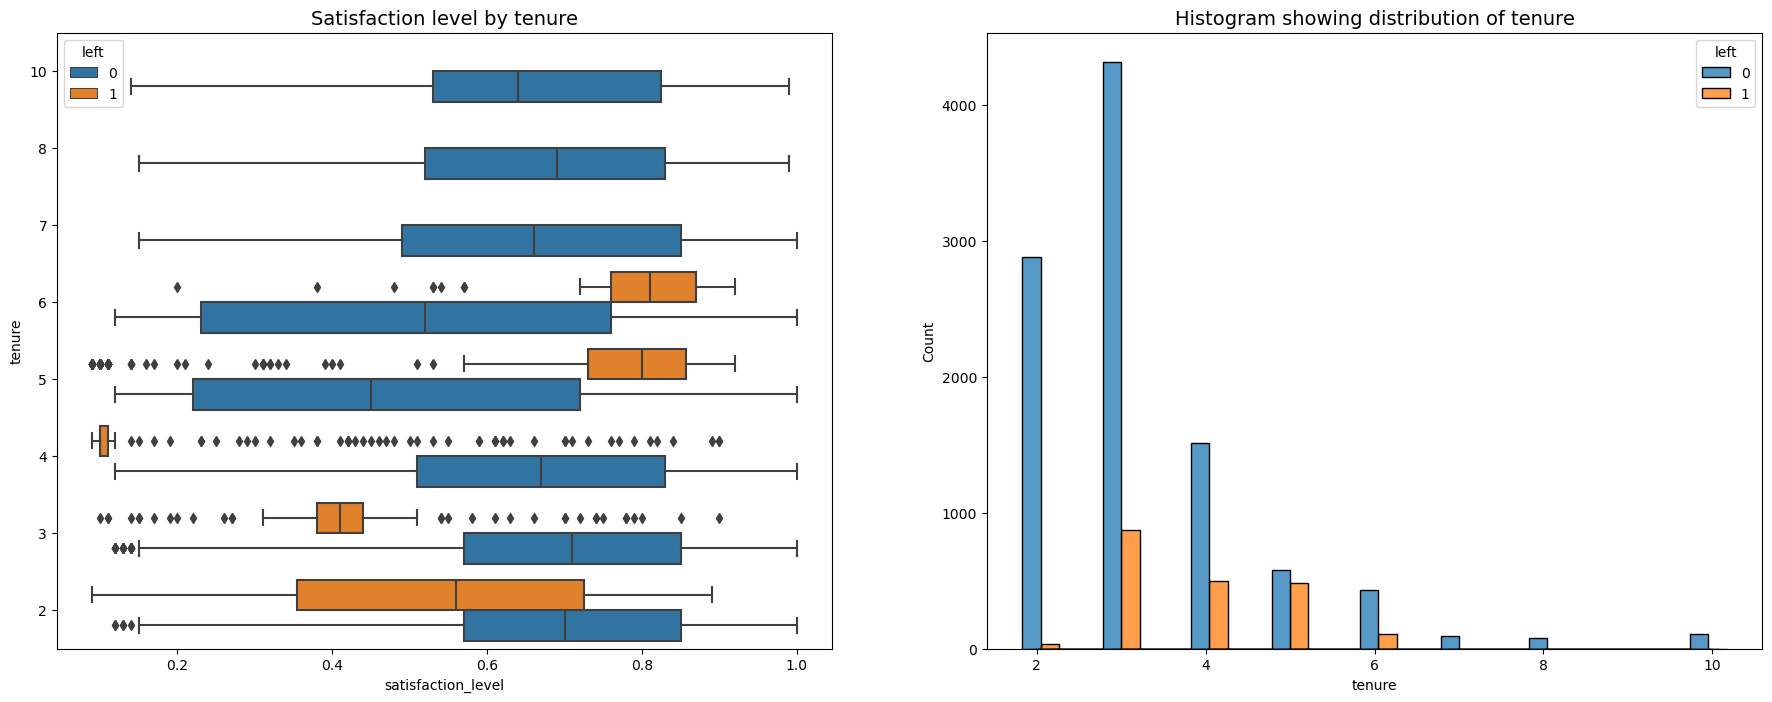

In [121]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Histogram showing distribution of tenure', fontsize='14')

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction level by tenure', fontsize='14')

plt.show();

- High turnover rates are observed in the initial years (2 - 3 years) of employment. This suggests that early years of employment are critical, and interventions to improve satisfaction during this period could reduce turnover.
- An anomaly is observed among four-year employees who left, who seem to have unusually low satisfaction levels. This indicates that specific factors affecting this group could be investigated further.
- As tenure increases (7 - 10 years), employees generally show higher satisfaction levels and are less likely to leave (maybe because they have higher ranks or are higher - paid employees). However, the overall number of employees with long tenures is low, suggesting a need for strategies not only to improve satisfaction but also to retain employees for longer periods.

In [122]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


 - Employees who stayed (left = 0) have a higher mean and median satisfaction score (approximately 0.67 and 0.69 respectively) compared to those who left (left = 1) (approximately 0.44 and 0.41 respectively).
 - The mean satisfaction score is slightly lower than the median for employees who stayed, which suggests that the distribution of satisfaction scores might be slightly skewed to the left.

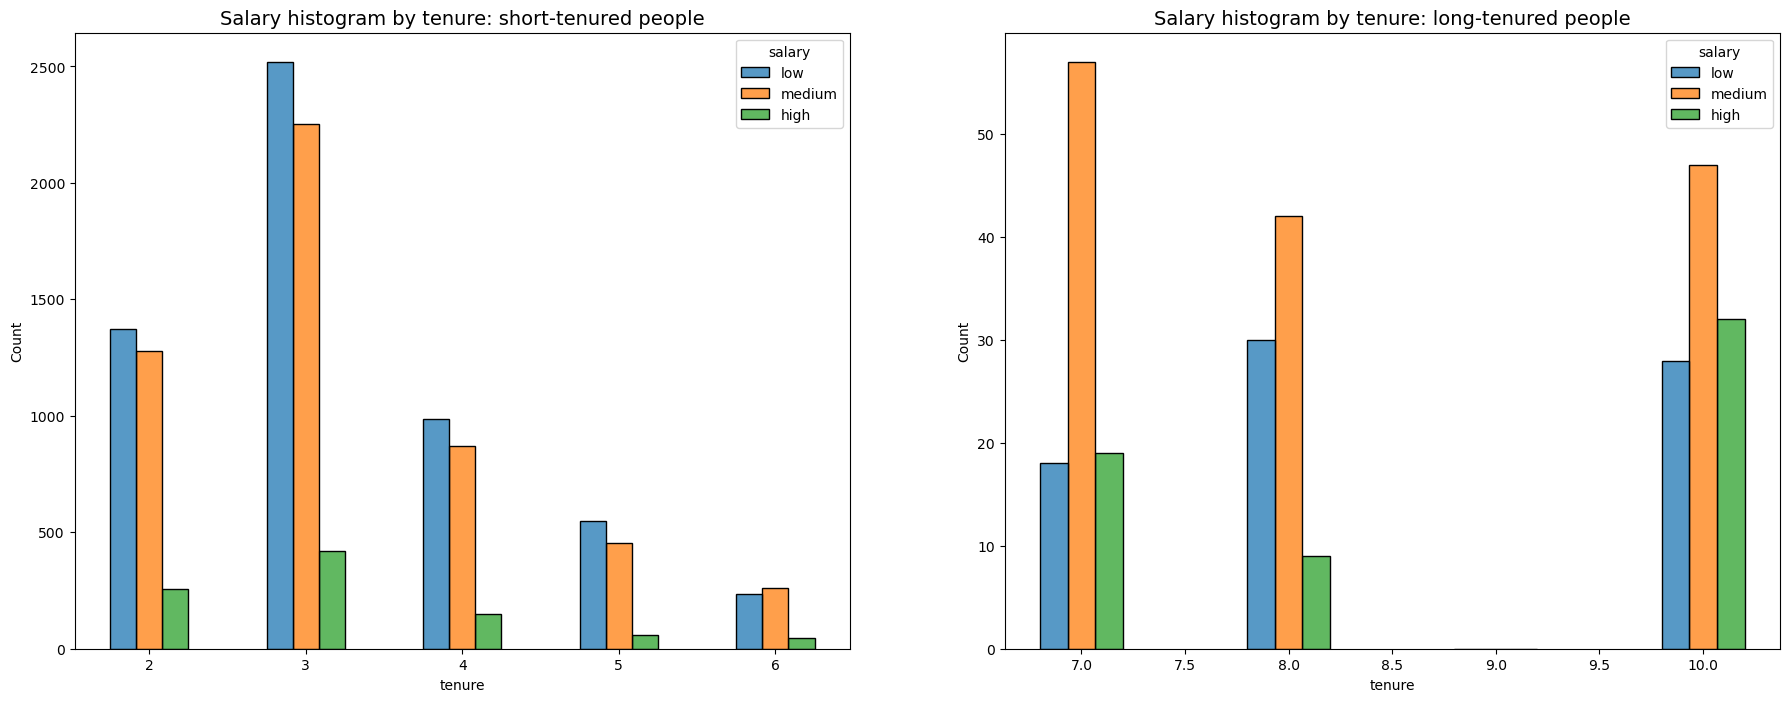

In [123]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

As tenure increases within the organization, there is a noticeable shift towards a more even distribution of salary levels, with a significant increase in the proportion of high - salary employees. This suggests that longer tenure is associated with higher salary levels, possibly due to factors like increased experience, skills, or job roles.

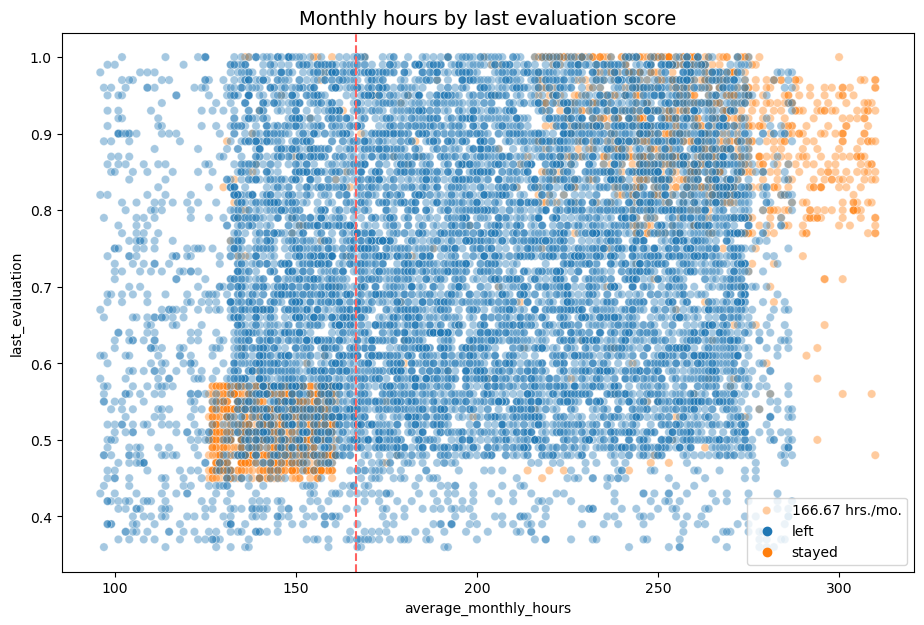

In [124]:
# Scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(11,7))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

 - The trend observed shows that employees working significantly more than standard hours (200+ hours / month) and those at performance extremes (very high or low performers) are more likely to leave the company.
 - There seems to be a correlation between hours worked and evaluation score.
 - There are outliers such as employees with very low working hours (< 120 hours / month) across all performance levels and those with perfect evaluation scores (1.0), which could indicate part-time roles.
 - Most of the employees in this company work well over 167 hours per month.

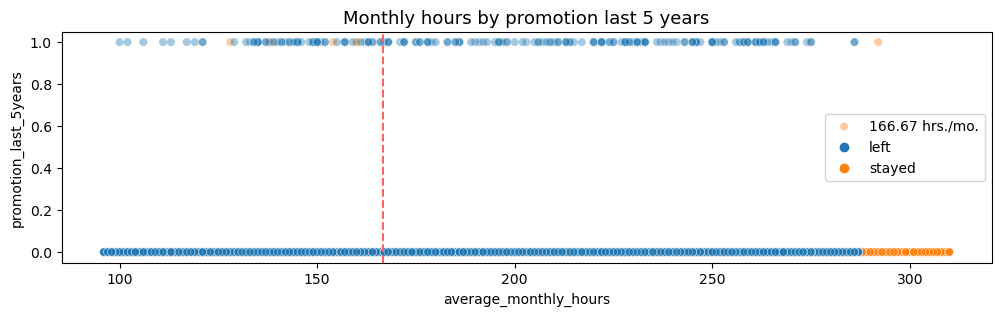

In [125]:
# Plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(12, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='13');

- All of the employees who left were working the longest hours  
- Very few employees who were promoted in the last five years left
- Very few employees who worked the most hours were promoted

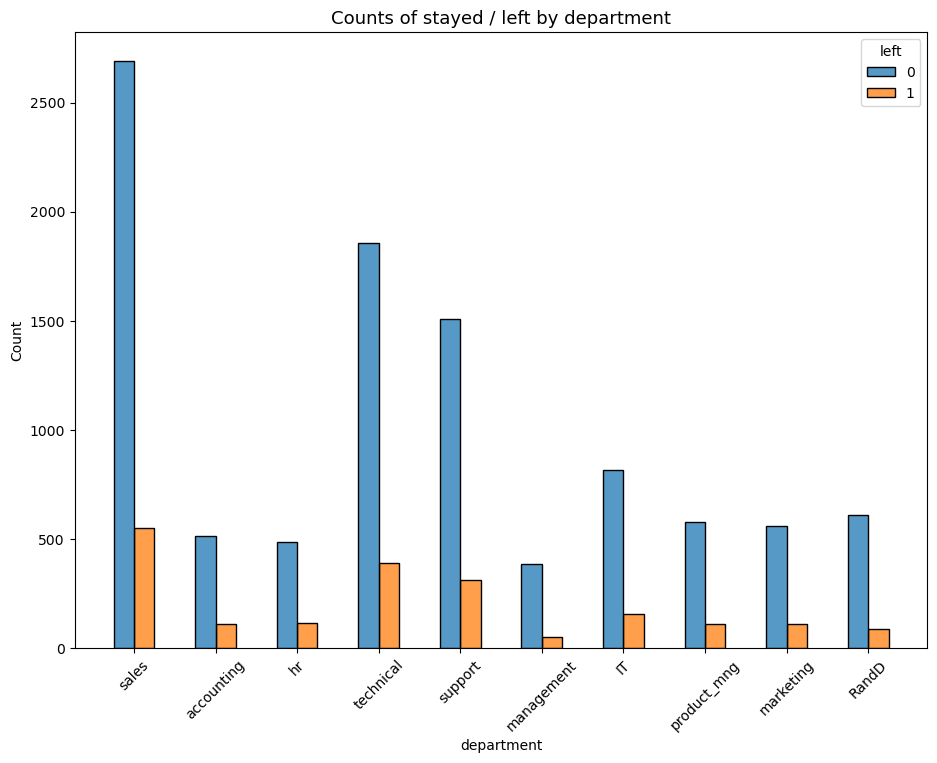

In [126]:
# Stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=True, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Counts of stayed / left by department', fontsize=13)
plt.show()

The proportion of people who left vs stayed seems to be uniform with not much variation across all the departments

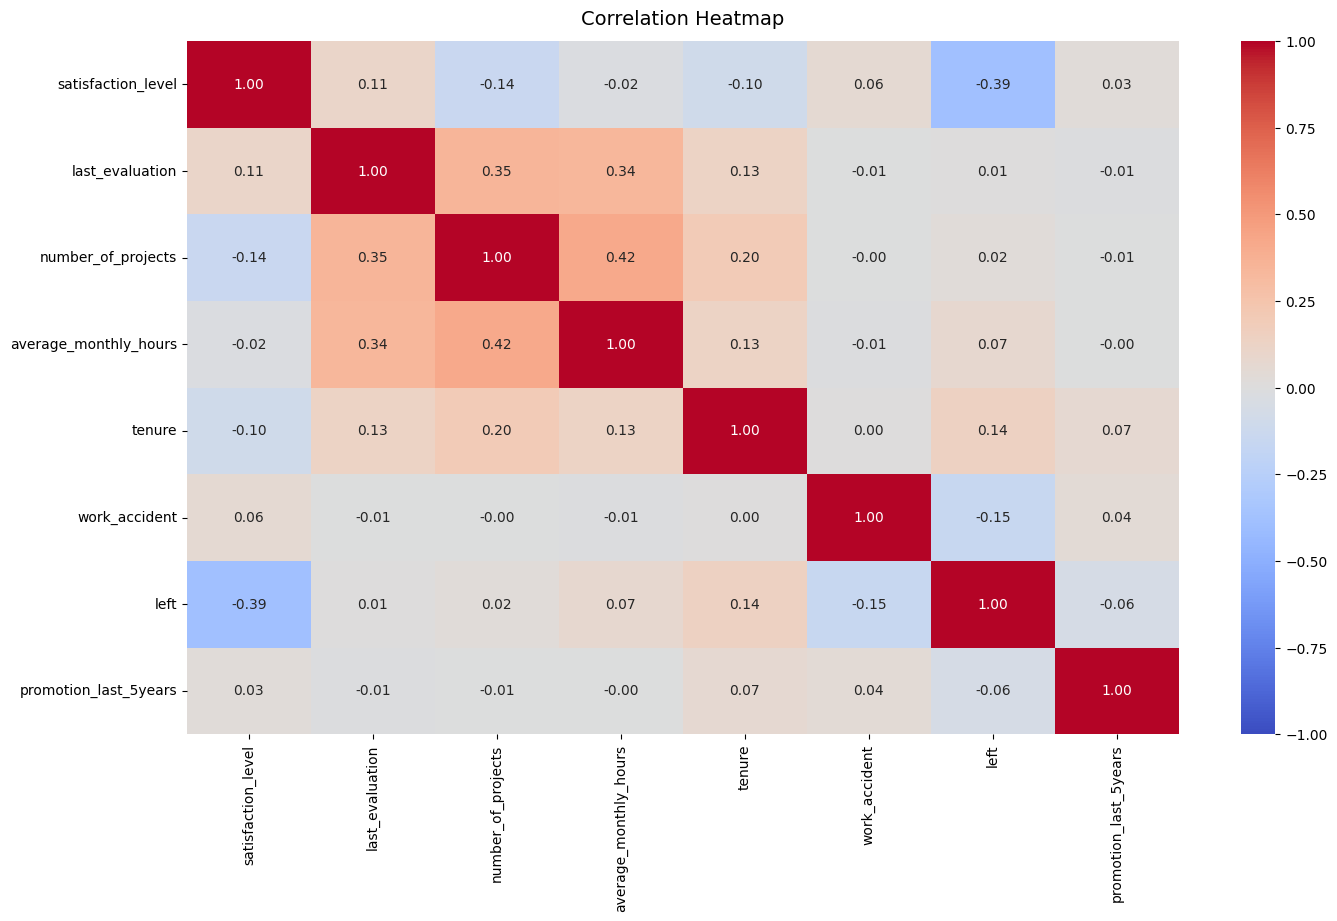

In [14]:
# Select only numeric columns
numeric_cols = df0.select_dtypes(include=np.number)

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt=".2f")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)
plt.show()

The correlation heatmap confirms that :-
- The number of projects, monthly hours, and evaluation scores all have some positive correlation with each other
- Employee turnover is inversely related to their level of satisfaction

### Insights

High turnover rates are linked to overwork (200+ hours  /month), under-engagement (handling 2 projects), and extreme performance scores. Early employment years (2 - 3 years) are critical for retention, while employees with over six years of tenure tend not to leave. Satisfaction levels play a key role in retention. Salary distribution becomes more even as tenure increases, suggesting longer tenure is associated with higher salaries. Despite most employees working over 167 hours / month, promotion rates are low, especially among those working the longest hours.

## Model Building

Goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable `left` can be either 1 (indicating employee left) or 0 (indicating employee didn't leave). 

### Feature Engineering 

Creating a new feature that roughly captures whether an employee is overworked. 

In [128]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df1['overworked'] = df1['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df1['overworked'].max())
print('Min hours:', df1['overworked'].min())

Max hours: 310
Min hours: 96


In [129]:
# Define `overworked` as working > 175 hrs/week
df1['overworked'] = (df1['overworked'] > 175).astype(int)

# Display first few rows of new column
df1['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int32

Drop the `average_monthly_hours` column.

In [130]:
# Drop the `average_monthly_hours` column
df1 = df1.drop('average_monthly_hours', axis=1)
# Display first few rows of resulting dataframe
df1.head()

,satisfaction_level,last_evaluation,number_of_projects,tenure,work_accident,left,promotion_last_5years,department,salary,overworked
0,0.38,0.53,2,3,0,1,0,sales,low,0
1,0.80,0.86,5,6,0,1,0,sales,medium,1
2,0.11,0.88,7,4,0,1,0,sales,medium,1
3,0.72,0.87,5,5,0,1,0,sales,low,1
4,0.37,0.52,2,3,0,1,0,sales,low,0


### Feature Analysis



In [131]:
# Perform one-hot encoding on categorical features
df1_encoded = pd.get_dummies(df1)

# Split the data into features and target variable
X = df1_encoded.drop('left', axis=1)
y = df1_encoded['left']

Feature: satisfaction_level, Score: 0.3658794475335576
Feature: number_of_projects, Score: 0.19049319725183153
Feature: tenure, Score: 0.189132450021018


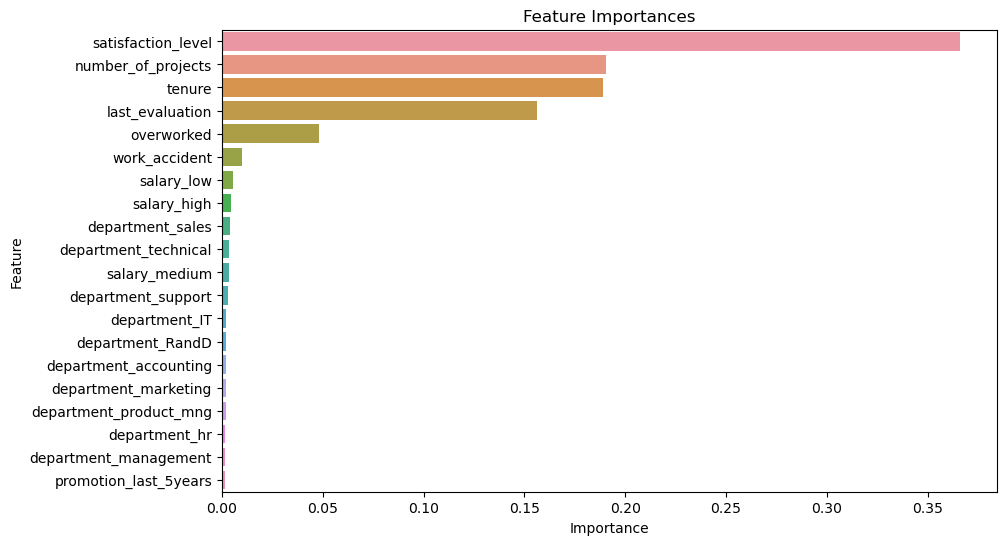

In [132]:
# Initialize a Random Forest classifier
clf = RandomForestClassifier()

# Train the classifier
clf.fit(X, y)

# Get feature importances
importances = clf.feature_importances_

# Create a DataFrame of features and their importances
features = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
features = features.sort_values(by='Importance', ascending=False)

# Print the top 3 features with their scores
top_features = features.head(3)
for index, row in top_features.iterrows():
    print(f"Feature: {row['Feature']}, Score: {row['Importance']}")

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Modeling Approach A: Logistic Regression

Before splitting the data, encode the non - numeric variables :-

In [133]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame
df_encoded = df1.copy()

# Perform one-hot encoding on the 'department' column
df_encoded = pd.get_dummies(df_encoded, columns=['department'])

# Convert 'salary' column to ordinal
salary_order = {'low': 0, 'medium': 1, 'high': 2}
df_encoded['salary'] = df_encoded['salary'].map(salary_order)

df_encoded.head()

,satisfaction_level,last_evaluation,number_of_projects,tenure,work_accident,left,promotion_last_5years,salary,overworked,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,3,0,1,0,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,6,0,1,0,1,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,4,0,1,0,1,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,5,0,1,0,0,1,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,3,0,1,0,0,0,False,False,False,False,False,False,False,True,False,False


Since logistic regression is quite sensitive to outliers, at this stage we remove the outliers in the tenure column that were identified earlier :-

In [134]:
# Get indices of rows containing outliers
outlier_indices = outliers.index

# Remove outliers
df_encoded = df_encoded.drop(outlier_indices)

# Display the first few rows of the new DataFrame
df_encoded.head()

,satisfaction_level,last_evaluation,number_of_projects,tenure,work_accident,left,promotion_last_5years,salary,overworked,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,3,0,1,0,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,4,0,1,0,1,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,5,0,1,0,0,1,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,3,0,1,0,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,3,0,1,0,0,0,False,False,False,False,False,False,False,True,False,False


Isolating the outcome variable :-

In [135]:
# Isolate the outcome variable
y = df_encoded['left']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

Selecting features for the model, based on the feature analysis and t - test done earlier :-

In [136]:
# Select features for the model
features = ['overworked','satisfaction_level', 'number_of_projects', 'tenure', 'last_evaluation','work_accident']
X = df_encoded[features]

X.head()

,overworked,satisfaction_level,number_of_projects,tenure,last_evaluation,work_accident
0,0,0.38,2,3,0.53,0
2,1,0.11,7,4,0.88,0
3,1,0.72,5,5,0.87,0
4,0,0.37,2,3,0.52,0
5,0,0.41,2,3,0.50,0


Split the data into training set and testing set :-

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Construct a logistic regression model and fit it to the training dataset :-

In [138]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

Test the logistic regression model: use the model to make predictions on the test set :-

In [139]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

Create a confusion matrix to visualize the results of the logistic regression model :-

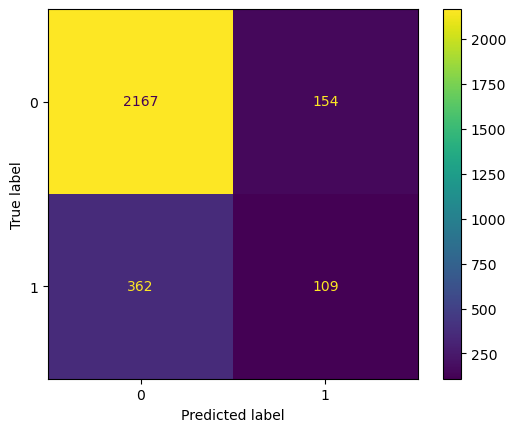

In [140]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives.

- True negatives: The number of people who did not leave that the model accurately predicted did not leave.
- False positives: The number of people who did not leave the model inaccurately predicted as leaving.
- False negatives: The number of people who left that the model inaccurately predicted did not leave
- True positives: The number of people who left the model accurately predicted as leaving

Check the class balance :-

In [141]:
# Check the class balance
class_balance = df_encoded['left'].value_counts(normalize=True)
print(class_balance)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64


There is an approximately 83% - 17% split. While there is a class imbalance in the data, it's not severe enough to require immediate resampling or rebalancing techniques.

Create a classification report for the Logistic Regression Model :-

In [142]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
report1 = classification_report(y_test, y_pred, target_names=target_names)
print(report1)

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.89      2321
    Predicted would leave       0.41      0.23      0.30       471

                 accuracy                           0.82      2792
                macro avg       0.64      0.58      0.60      2792
             weighted avg       0.78      0.82      0.79      2792



The classification report shows that the model is more accurate in predicting employees who would not leave (precision: 0.86, recall: 0.93) than those who would leave (precision: 0.41, recall: 0.23). The overall accuracy of the model is 0.82, indicating it correctly predicted the outcome for 82% of all instances.

### Modeling approach B: XGBoost

Instantiate XGBoost model, define hyperparameters and scoring metrics, and initialize GridSearchCV :-

In [143]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Instantiate XGBoost model
xgb_clf = XGBClassifier()

# Assign a dictionary of hyperparameters to search over
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 500]
}

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1', 'roc_auc': 'roc_auc'}

# Instantiate GridSearchCV
xgb_grid_search = GridSearchCV(xgb_clf, xgb_param_grid, cv=5, scoring=scoring, refit='roc_auc')

Fit the model to training data :-

In [144]:
%%time
# Fit GridSearchCV to the training data
xgb_grid_search.fit(X_train, y_train)

CPU times: total: 2min 11s
Wall time: 1min 21s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [145]:
xgb_grid_search.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}

In [146]:
xgb_grid_search.best_score_

0.9824786790882154

This is a strong AUC score, which shows that this model can predict employees who will leave very well.

In [147]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

# Use the function to get the results
results_table = make_results('XGBoost', xgb_grid_search, 'auc')
results_table

,model,precision,recall,F1,accuracy,auc
0,XGBoost,0.966091,0.907852,0.935985,0.979104,0.982479


### Modeling Approach C:  K-Nearest Neighbors (KNN) 

In [160]:
knn = KNeighborsClassifier()

# Define the parameter values that should be searched
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1', 'roc_auc': 'roc_auc'}

# Instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [161]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [162]:
grid.best_params_

{'n_neighbors': 4, 'weights': 'uniform'}

In [163]:
grid.best_score_

0.97743475248287

In [164]:
# Make predictions on the testing set
y_pred = grid.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2321
           1       0.98      0.91      0.94       471

    accuracy                           0.98      2792
   macro avg       0.98      0.95      0.97      2792
weighted avg       0.98      0.98      0.98      2792

[[2310   11]
 [  41  430]]


### Modeling approach D: Decision Tree

In [166]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [167]:
%%time
tree1.fit(X_train, y_train)

CPU times: total: 3.62 s
Wall time: 4.81 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'roc_auc', 'recall', 'precision', 'f1', 'accuracy'})

In [168]:
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [169]:
# Check best AUC score on CV
tree1.best_score_

0.9734297106163362

In [170]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [171]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.94971,0.907878,0.928126,0.976359,0.97343


#### Decision tree splits

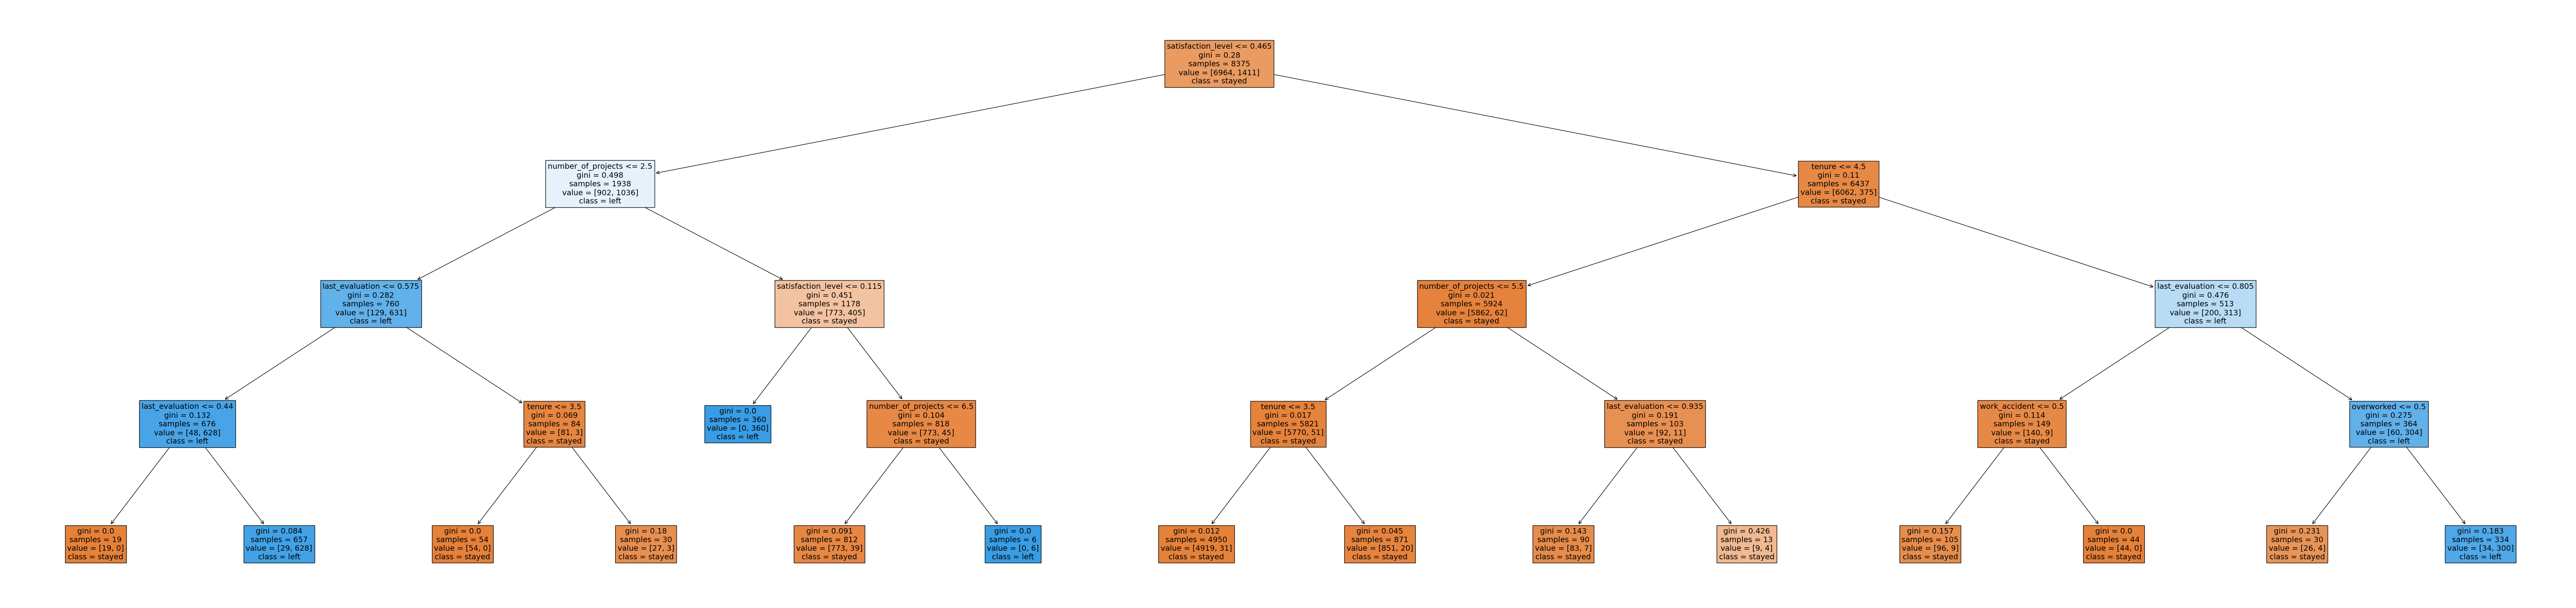

In [178]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree1.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

#### Decision tree feature importance

In [179]:
tree1_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree1_importances = tree1_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree1_importances = tree1_importances[tree1_importances['gini_importance'] != 0]
tree1_importances

,gini_importance
satisfaction_level,0.558982
tenure,0.169509
last_evaluation,0.140003
number_of_projects,0.115238
overworked,0.016041
work_accident,0.000227


## Evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






### Summary of model results

- **Logistic Regression:** This model has an accuracy of 82%. However, it seems to struggle with predicting customers who would leave (class 1), with a precision of 41% and recall of 23%. This indicates that the model is not very effective at correctly identifying positive instances (customers who would leave).
- **XGBoost:** This model performs significantly better with an accuracy of 97.9% and an AUC of 0.982. It has a high precision (96.6%) and recall (90.8%), indicating that it is effective at predicting both classes.
- **K-Nearest Neighbors (KNN):** This model also performs very well with an accuracy of 98%. The precision and recall for both classes are high, indicating that the model is effective at predicting both classes. The confusion matrix further confirms this, showing that the model makes relatively few misclassifications.
- **Decision Tree:** This model has an accuracy of 97.6% and an AUC of 0.973. It has a high precision (94.9%) and recall (90.8%), indicating that it is effective at predicting both classes.

In summary, the `XGBoost, KNN, and Decision Tree models all perform well on the dataset, with high accuracy, precision, and recall`. The Logistic Regression model, however, seems to struggle with predicting customers who would leave.d leave.

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in moright.  effort. 

#### **Next Steps**

There is a chance that there is some data leakage occurring. Data leakage is when you use data to train your model that should not be used during training, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

- In this case, it's likely that the company won't have satisfaction levels reported for all of its employees.
- It could also be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score.